<a href="https://colab.research.google.com/github/nasalidesu/silver-adventure/blob/main/Assignment_BDA_Nasali_1815091.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Big Data Analytic

> Prepared by : AHMAD NASALI BIN ABD MANAF | nasalicisco@gmail.com

> Analysis on Belarus Used Car dataset 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [ ]:
pip install plotly --upgrade # some error in path so need upgrade plotly express to enable the plotting the treemap

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/cars.csv")
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7




1.   what is the optimal range for odometer value for anyone before they want to sell their car ?
2.   which brand is for used car is most and least popular?
3.   How long the car is listed in the catalog?
4.   if someone want to know  which car to buy for long term investment, which car brand has the highest resell values?
5.   What is the forecast for used car price in future?



# Data preprocessing

In [ ]:
df.dtypes # see the data types of each column, to see which column is suitable to do calculation

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

In [ ]:
df.shape # the dimension/ how many columns and rows

(38531, 30)

In [ ]:
df.isnull().sum() # check null values in each column

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

look there are null values in engine capaticty, so we drop them 

In [ ]:
df.dropna(inplace=True) # drop any null values in any column

In [ ]:
df.isnull().sum() # check the null values again

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

The null values already dropped from the column engine capacity

Since most of tha data is potentially have meaningful duplicate value such brand, state,color, so its will not practical to drop any duplicate data since every row beside null values could  be meaningful.

# Data Wrangling

In [ ]:
df.nunique(axis=0) # see the unique values/data in each column

manufacturer_name      55
model_name           1116
transmission            2
color                  12
odometer_value       6060
year_produced          64
engine_fuel             5
engine_has_gas          2
engine_type             2
engine_capacity        61
body_type              12
has_warranty            2
state                   3
drivetrain              3
price_usd            2677
is_exchangeable         2
location_region         6
number_of_photos       61
up_counter            384
feature_0               2
feature_1               2
feature_2               2
feature_3               2
feature_4               2
feature_5               2
feature_6               2
feature_7               2
feature_8               2
feature_9               2
duration_listed       786
dtype: int64

what are the  top 5 most occurence values in each column?

In [ ]:
for col in df.columns:
  print(col," top unique values ",df[col].value_counts(sort=True).nlargest(5))
  print("-------------------------------------------")

manufacturer_name  top unique values  Volkswagen    4243
Opel          2759
BMW           2608
Ford          2566
Renault       2493
Name: manufacturer_name, dtype: int64
-------------------------------------------
model_name  top unique values  Passat    1423
Astra      751
Golf       707
A6         687
Mondeo     637
Name: model_name, dtype: int64
-------------------------------------------
transmission  top unique values  mechanical    25633
automatic     12888
Name: transmission, dtype: int64
-------------------------------------------
color  top unique values  black     7703
silver    6851
blue      5801
white     4209
grey      3751
Name: color, dtype: int64
-------------------------------------------
odometer_value  top unique values  300000    1794
350000     959
250000     940
200000     775
400000     742
Name: odometer_value, dtype: int64
-------------------------------------------
year_produced  top unique values  1998    2218
2008    2144
1999    1879
1997    1860
2001    

summarize the numeric column to mean, std, mic, max

In [ ]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38521.000000,38521.000000,38521.000000,38521.000000,38521.000000,38521.000000,38521.000000
mean,248910.074427,2002.940863,2.055161,6637.160884,9.648062,16.306586,80.584616
std,136059.499858,8.064761,0.671178,6425.198996,6.092860,43.291786,112.838577
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8950.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


check again all the datatype of each column to find which column has numeric data type so that it suitable to perform any calculation analysis and which is object to analyse the frequency/occurences

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38521 non-null  object 
 1   model_name         38521 non-null  object 
 2   transmission       38521 non-null  object 
 3   color              38521 non-null  object 
 4   odometer_value     38521 non-null  int64  
 5   year_produced      38521 non-null  int64  
 6   engine_fuel        38521 non-null  object 
 7   engine_has_gas     38521 non-null  bool   
 8   engine_type        38521 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38521 non-null  object 
 11  has_warranty       38521 non-null  bool   
 12  state              38521 non-null  object 
 13  drivetrain         38521 non-null  object 
 14  price_usd          38521 non-null  float64
 15  is_exchangeable    38521 non-null  bool   
 16  location_region    385

# Question 1

**1 - what is the optimal range for odometer value of their car for anyone before they want to sell their car ?**

In [ ]:
df['odometer_value'].describe() # describe the column to see the important variables

count      38521.000000
mean      248910.074427
std       136059.499858
min            0.000000
25%       158000.000000
50%       250000.000000
75%       325000.000000
max      1000000.000000
Name: odometer_value, dtype: float64

the **highest odometer values** of the used cart in the catalog is **1 million km** and the lowest could be 0, (it could be the odometer is reset) . The **average** of odometer of the used car is **248910 KM**


The plotting the **data distibution** to see which the **density of the odometer** values and find which the range before someone want to sell their car 

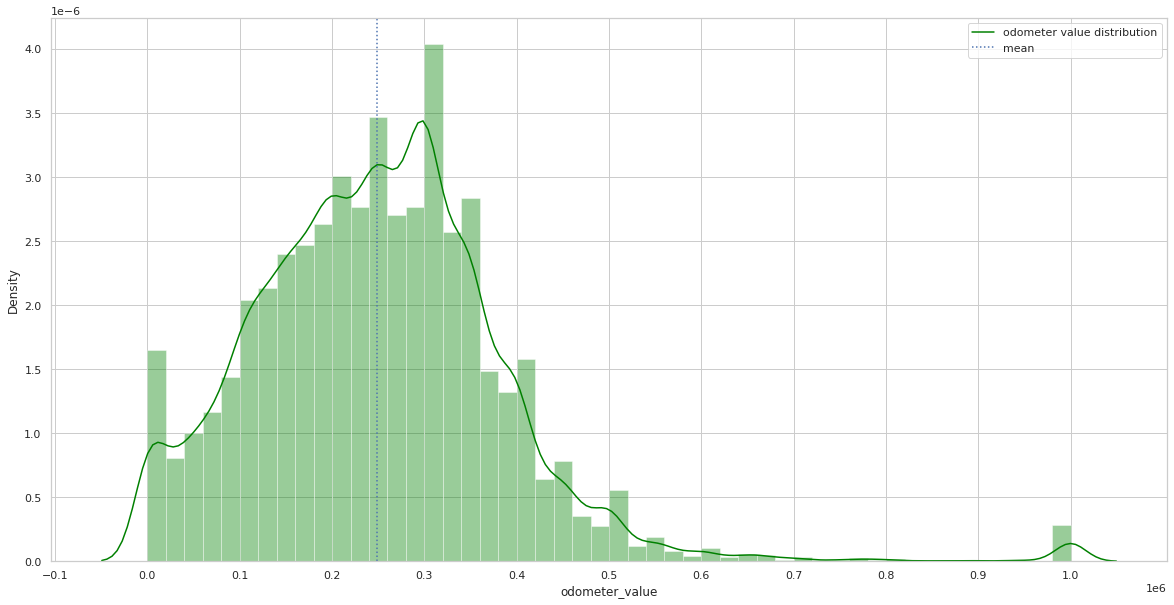

In [ ]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize=(20,10)) 
sns.distplot(df['odometer_value'], color='green')
plt.xticks([-100000,0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000])
plt.axvline(df['odometer_value'].mean(), ls=':')

plt.legend(['odometer value distribution','mean'])
plt.show()

In [ ]:
df['odometer_value'].mean() # check the mean of the odometer values

248910.07442693596

In [ ]:
x = df['odometer_value'].to_numpy() # convert from float to numpy to ease calculation
type(x)

numpy.ndarray

to enchance the range fo the odometer range that is optimal . Using the standard deviation to find the consistency of the odometer of the used car

No handles with labels found to put in legend.


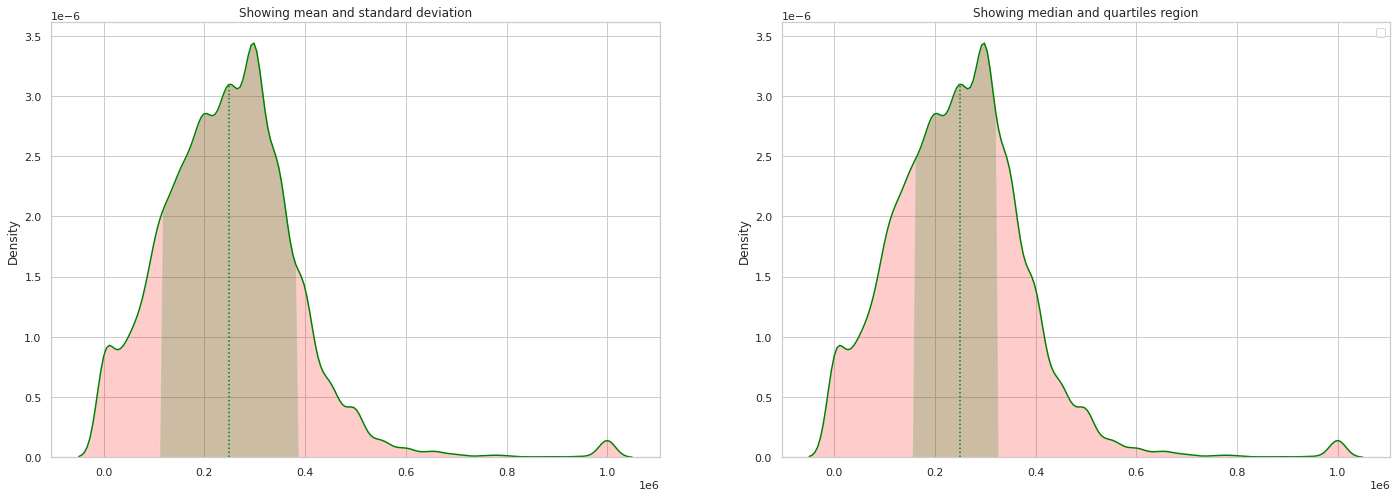

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(24, 8))
for ax in axes:
    sns.kdeplot(x, shade=False, color='green', ax=ax)
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    if ax == axes[0]:
        middle = x.mean()
        sdev = x.std()
        left = middle - sdev
        right = middle + sdev
        ax.set_title('Showing mean and standard deviation')
    else:
        left, middle, right = np.percentile(x, [25, 50, 75])
        ax.set_title('Showing median and quartiles region')
    ax.vlines(middle, 0, np.interp(middle, xs, ys), color='green', ls=':') # create the mean line
    ax.fill_between(xs, 0, ys, facecolor='red', alpha=0.2) 
    ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='green', alpha=0.2)
    
    ax.set_ylim(ymin=0)
ax.legend()
plt.show()

By implementing box plot and interquatile we can get the data dispersion and spread. Look like it doesn't have much different by implementing the standard deviation and quartile region

No handles with labels found to put in legend.


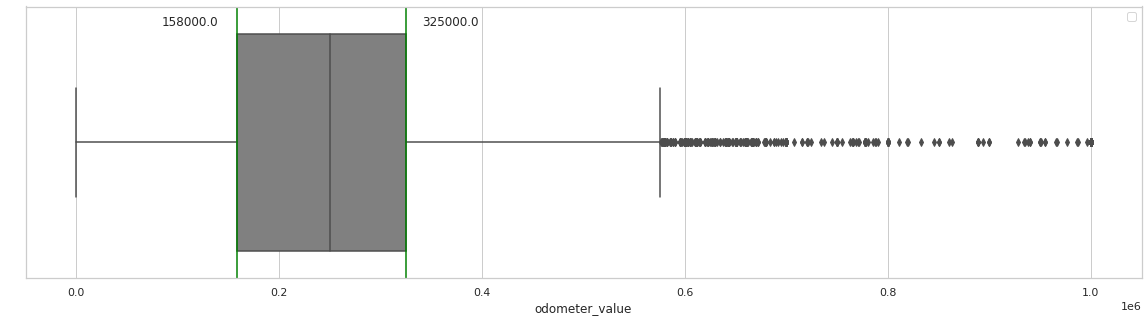

In [ ]:
q1 = np.percentile(df['odometer_value'], 25)
q3 = np.percentile(df['odometer_value'], 75)
fig, ax = plt.subplots(figsize=(20,5)) 
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['odometer_value'], color='grey')
ax.legend()
plt.axvline(np.percentile(df['odometer_value'], 25), ls='solid',color='green')
plt.axvline(np.percentile(df['odometer_value'], 75), ls='solid',color='green')
plt.text( 190, 300, q1,ha='center', va='center',transform=None)  # position q1 value absolutely at specific pixel on image
plt.text( 450, 300, q3,ha='center', va='center',transform=None)  # position q3 value absolutely at specific pixel on image
plt.show()

The popular or **optimal odometer values** is **between 158 000km to 325 000km** since most of the data spread withing this range. 
Range around 248 910km also optimal for someone to sell their car. So if someone wants to sell their car this is the optimal odometer value for them!

# Question 2

**which brand is for used car is most and least popular?**

In [ ]:
df.head() #check the head again

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


In [ ]:
df['manufacturer_name'].value_counts(sort=True) # count the occurence of the brand name 

Volkswagen       4243
Opel             2759
BMW              2608
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1356
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              822
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         435
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

there are many brand in the catalog seem the most popular to are **Volkswagen** followed by **Opel**

In [ ]:
def treemap(categories,title,path,values):  #creating funtion for treemap
    fig = px.treemap(categories, path=path, values=values, height=700,
                 title=title, color_discrete_sequence = px.colors.sequential.RdBu)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

In [ ]:
Number_Manifactured = df['manufacturer_name'].value_counts() #creating ecessaty varibles and parameters to be put into treeman function
values = Number_Manifactured.values
categories = pd.DataFrame(data=Number_Manifactured.index, columns=["manufacturer_name"])
categories['values'] = values

In [ ]:
treemap(categories,'manufacturer_name',['manufacturer_name'],categories['values'])
#if there is an error in this code like path , please update the plotly libraries .Restart the runtime, run all over again

Indeed the **most popular car is Volkswagen** but there are many other cars in the catalog that **significantly have high in number** such as **Opel, BMW, renault, Mercedes, Audi.** 

since there are many used car with different brand name, taking top 10 most popular brand 

In [ ]:
df['manufacturer_name'].value_counts(sort=True).nlargest(10)

Volkswagen       4243
Opel             2759
BMW              2608
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1356
Name: manufacturer_name, dtype: int64

what about the least popular car brand ?

In [ ]:
data1 =df['manufacturer_name'].value_counts(ascending=False)

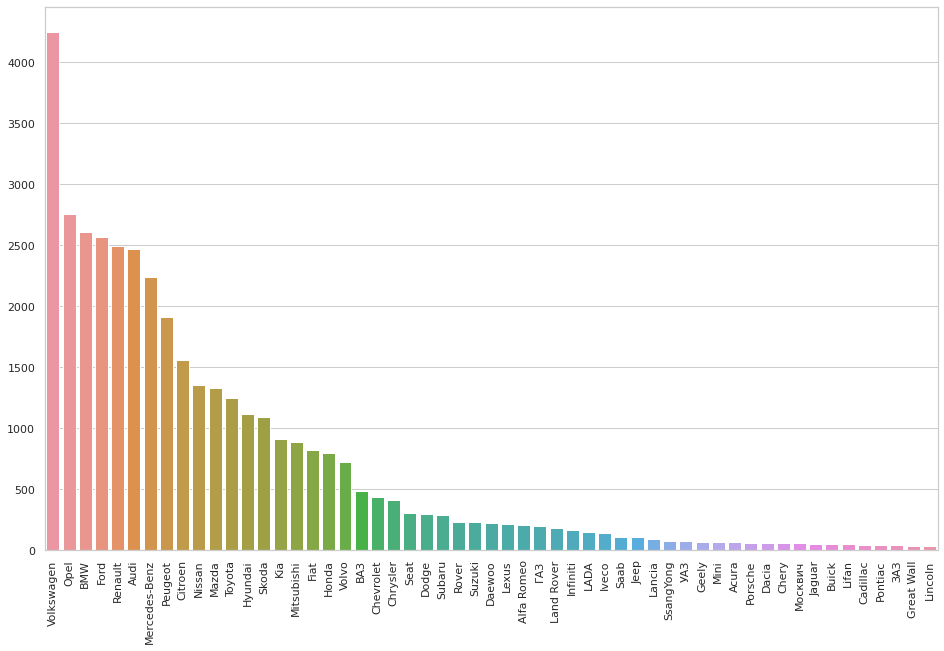

In [ ]:
fig, ax = plt.subplots(figsize=(16,10)) 
sns.barplot(data1.index, data1.values)
plt.xticks(rotation=90)
plt.show()

As we already know that Volkswagen is the most popular brand to be resell followed by Open, BMW, Ford and Renault then, the **least popular brand** in the catalog **Great Wall, Lincoln, 3A3, Pontiac.**

# Question 3

**How long the car is listed in the catalog?**

In [ ]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


In [ ]:
data2 =df['duration_listed'].value_counts(ascending=False)
data2.head(10)

57    680
1     653
2     642
3     553
91    536
32    533
61    523
60    517
11    503
4     473
Name: duration_listed, dtype: int64

duration listed car is the number of days the car is listed in the catalog

In [ ]:
duration = df.groupby("manufacturer_name").duration_listed.mean().sort_values(ascending = False) 
duration.index

Index(['Lincoln', 'Москвич', 'ЗАЗ', 'Acura', 'Jaguar', 'Lancia', 'Jeep', 'ГАЗ',
       'Mini', 'Cadillac', 'Porsche', 'Saab', 'Geely', 'Chery', 'Suzuki',
       'Subaru', 'Great Wall', 'УАЗ', 'Mercedes-Benz', 'Iveco', 'Chrysler',
       'Alfa Romeo', 'Buick', 'Land Rover', 'Pontiac', 'BMW', 'Fiat', 'Lexus',
       'Volvo', 'SsangYong', 'Toyota', 'Infiniti', 'Audi', 'Chevrolet',
       'Dodge', 'Mitsubishi', 'Nissan', 'Ford', 'Hyundai', 'ВАЗ', 'Volkswagen',
       'Kia', 'Opel', 'Daewoo', 'Honda', 'Citroen', 'Peugeot', 'Mazda',
       'Renault', 'Lifan', 'Rover', 'Seat', 'Dacia', 'LADA', 'Skoda'],
      dtype='object', name='manufacturer_name')

we create the new series of based on duration of the listed car in the catalog. Since there are many car with different listed duration each, then we take the average of listed car based on the brand. In other words, we create index in the brand of car and the values is the average of listed car.

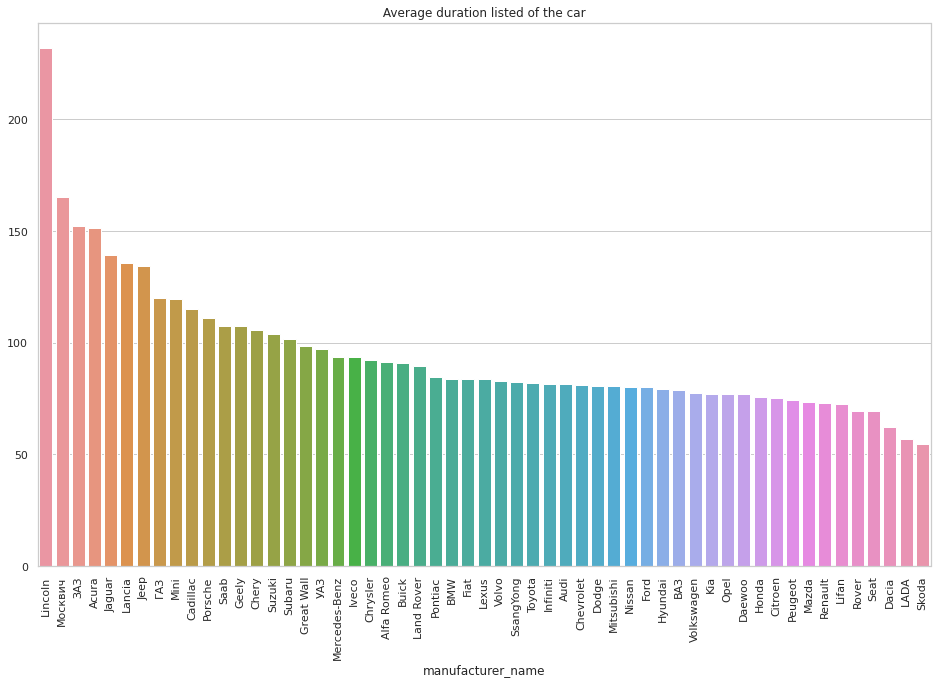

In [ ]:
fig, ax = plt.subplots(figsize=(16,10)) 
sns.barplot(duration.index, duration.values)
plt.xticks(rotation=90)
plt.title(' Average duration listed of the car ')
plt.show()

The car with brand **Lincoln** will most likely will **take a long time to be resell** since averagely it takes more than **200 days** to sell followed by Москвич russian car which it takes more than 150 days to resell. 

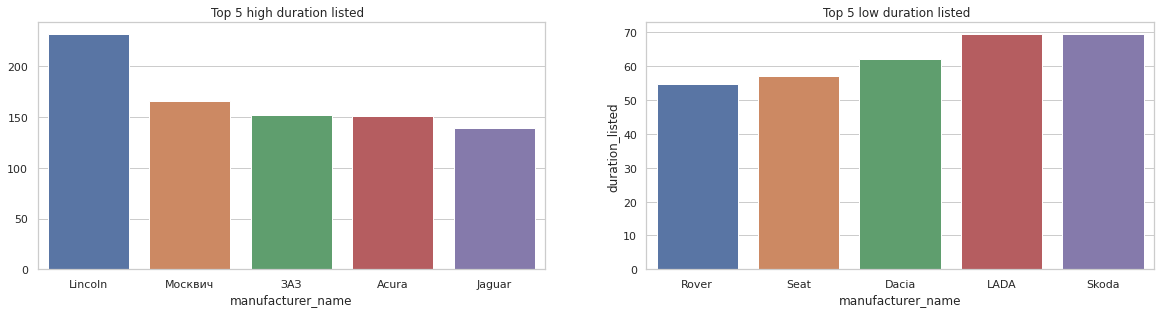

In [ ]:
fig, ax = plt.subplots(figsize=(20,10)) 
plt.subplot(2,2,1)
plt.title('Top 5 high duration listed  ')
sns.barplot(duration[:5].index, duration[:5].values)

plt.subplot(2,2,2)
plt.title('Top 5 low duration listed  ')
sns.barplot(duration[-5:].index, duration[-5:].sort_values())

plt.show()

The used car that most likely to be resell faster is brand **Rover and Seat**.
Both of these cars will averagely **take less than 2 months to be resell** again followed by **Dacia, LADA, Skoda** which take **not more than 70 days** to be resell

So if someone that has car with brand Rover most likely it will be sell faster and the brand Lincoln will take a long time to be resell

# Question 4

**if someone want to know which car to buy for long term investment, which car brand has the highest resell values?**

In [ ]:
prize = df.groupby("manufacturer_name").price_usd.mean().sort_values(ascending = False) # put the car that has high average value to new dataframe

In [ ]:
prize.head()

manufacturer_name
Porsche       18629.823770
Jaguar        17813.000000
Lexus         17130.560845
Land Rover    15195.300380
Skoda         13795.448466
Name: price_usd, dtype: float64

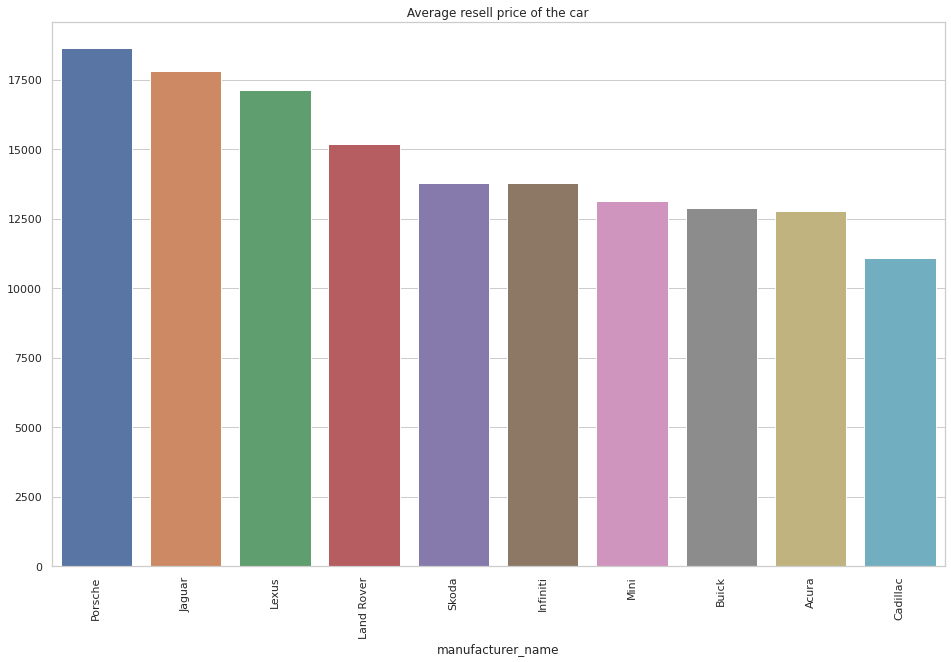

In [ ]:
fig, ax = plt.subplots(figsize=(16,10)) 
sns.barplot(prize[:10].index, prize[:10].values)
plt.xticks(rotation=90)
plt.title(' Average resell price of the car ')
plt.show()

Look like brand **Porsche , Jaguar and Lexus** have  **high resell values** compared to any other brand 

What make are some other features that make this car has high resell values?

In [ ]:
a=[] # taking name of top price car and put into the list
for x in range(10):    
    a.append(prize.index[x])
print(a)

['Porsche', 'Jaguar', 'Lexus', 'Land Rover', 'Skoda', 'Infiniti', 'Mini', 'Buick', 'Acura', 'Cadillac']


In [ ]:
# getporshe = df[(df['manufacturer_name']=='Porsche') | (df['manufacturer_name']=='Jaguar') | (df['manufacturer_name']=='Lexus') | (df['manufacturer_name']=='Land Rover') | (df['manufacturer_name']=='Skoda')]
top_price_car = df[df['manufacturer_name'].isin(a)] # take the top 10 high resell value car to new dataframe
# top_price_car.head()

why dont we plot scatter plot with certain features that could influence this high resell value car.

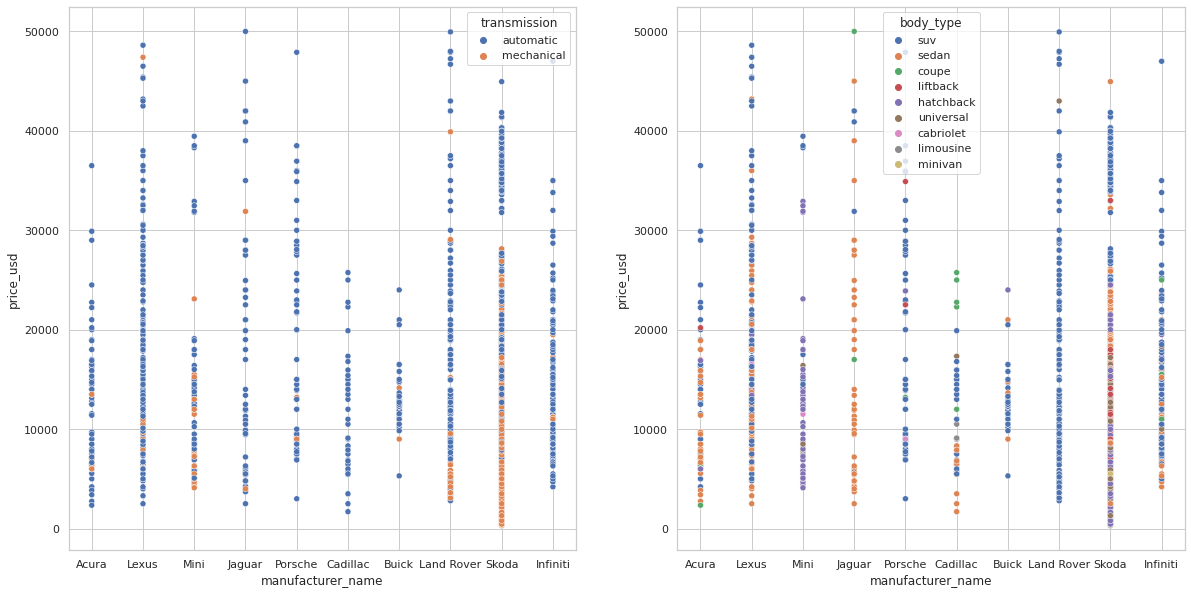

In [ ]:
fig, ax = plt.subplots(figsize=(20,10)) 
# sns.scatterplot(x= top_price_car.manufacturer_name, y= top_price_car.price_usd)
plt.subplot(1,2,1)
sns.scatterplot(x= "manufacturer_name", y= "price_usd",hue='transmission', data= top_price_car)

plt.subplot(1,2,2)
sns.scatterplot(x= "manufacturer_name", y= "price_usd",hue='body_type', data= top_price_car)
plt.show()

Look like the car with automatic transmission quite popular wheras SUV and Sedan influence the most to the resell price

# Question 5

**Can we predict the price of car with certain features available?**

So why dont we take several columns for the features of our model 

In [ ]:
df_new = df[['manufacturer_name', 'model_name', 'transmission', 'color', 'odometer_value', 'year_produced', 'engine_capacity', 'has_warranty', 'price_usd', 'duration_listed']]
df_new.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_capacity,has_warranty,price_usd,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,2.5,False,10900.00,16
1,Subaru,Outback,automatic,blue,290000,2002,3.0,False,5000.00,83
2,Subaru,Forester,automatic,red,402000,2001,2.5,False,2800.00,151
3,Subaru,Impreza,mechanical,blue,10000,1999,3.0,False,9999.00,86
4,Subaru,Legacy,automatic,black,280000,2001,2.5,False,2134.11,7


In [ ]:
train0=df_new
train0.shape

(38521, 10)

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder() #

In [ ]:
# numerics = ['int8', 'int16', 'int32', 'int64']#, 'float16', 'float32', 'float64'
# categorical_columns = []
# features = train0.columns.values.tolist()
# for col in features:
#     if train0[col].dtype in numerics: continue
#     categorical_columns.append(col)
# # Encoding categorical features
# for col in categorical_columns:
#     if col in train0.columns:
#         le = LabelEncoder()
#         le.fit(list(train0[col].astype(str).values))
#         train0[col] = le.transform(list(train0[col].astype(str).values))

In [ ]:
# train0['price_usd'] = train0['price_usd'].astype(int)

In [ ]:

# scaler = StandardScaler()
# train0 = pd.DataFrame(scaler.fit_transform(df_new), columns = df_new.columns)
# train0.head()

In [ ]:
train0=train0.apply(le.fit_transform) # since computer/ml doesn't understand string so we convert any string to numeric variables

In [ ]:
target_name = 'price_usd' 
y = train0[target_name] # the target is price
x = train0.drop([target_name], axis=1) #splitting features and label(=price)

In [ ]:
# train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #split test train into 80%train 20%test

In [ ]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(30816, 9) (30816,)
(7705, 9) (7705,)


In [ ]:
x.head() #look like everything is in numeric

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_capacity,has_warranty,duration_listed
0,45,763,0,8,2447,54,19,0,16
1,45,763,0,1,3953,46,24,0,83
2,45,519,0,7,5333,45,19,0,151
3,45,609,1,1,236,43,24,0,86
4,45,664,0,0,3794,45,19,0,7


look like everything are all in numeric values, then we can proceed with the implementation of machine learning algorithm

Using Random Forest Regression to predict the price. Since our target is continous (price) using regression model is significant 

In [ ]:
#importing rf
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
#importing metric module for evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(X_test,y_test)*100)

Mean Absolute Error: 113.47
Mean Squared Error: 24998.54
Root Mean Squared Error: 158.11
91.72092296637284


The regression **score** for the model is **91.72** which quite impressive score for the model!

It must be noted that this prediction of price based on the features:
*    manufacturer_name
*    model_name	
*    transmission	
*    color	odometer_value	
*    year_produced	
*    engine_capacity	
*    has_warranty	
*    duration_listed

In [ ]:
new_pred = pd.DataFrame(y_pred, columns=["prediction_price"]) #creating dataframe for prediction price
new_pred.head()

,prediction_price
0,1219.166667
1,424.100000
2,2513.200000
3,888.333333
4,1783.066667


In [ ]:
y_test.reset_index(drop=True, inplace=True) #if both has different index the concatation later on will generate different value such NAN
new_pred.reset_index(drop=True, inplace=True)

pred_and_actual = pd.concat([y_test, new_pred],axis=1) #concat predicted and actual
pred_and_actual.rename(columns={'price_usd': 'actual_price'}, inplace=True)
pred_and_actual.head()

,actual_price,prediction_price
0,1150,1219.166667
1,264,424.100000
2,2404,2513.200000
3,864,888.333333
4,1885,1783.066667


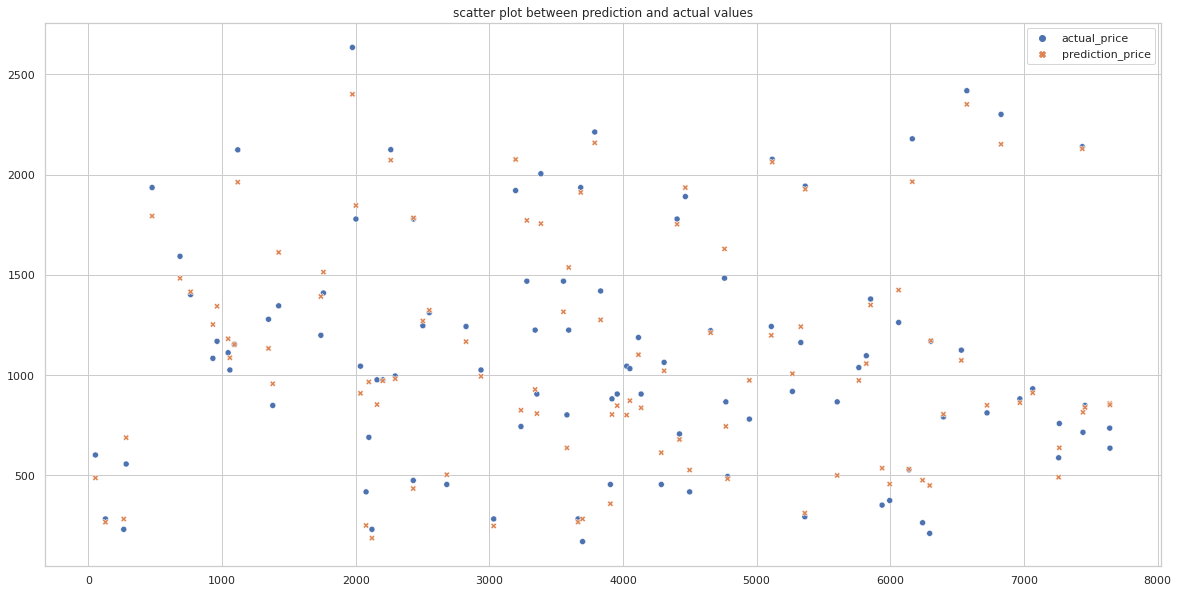

In [ ]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.scatterplot(data=pred_and_actual.sample(100))# take 100 sample if we take all the plot will be messy
plt.title('scatter plot between prediction and actual values')
plt.show()

From scatter plot above , we can see the comparison between  prediction and actual values for the regression model. 


***References***

---


The data is scraped in Belarus (western Europe) on the 2nd of December 2019, so the dataset is pretty fresh and relevant
*   https://www.kaggle.com/lepchenkov/usedcarscatalog
*   https://towardsdatascience.com/the-six-types-of-data-analysis-75517ba7ea61
*   https://medium.com/swlh/random-forest-and-its-implementation-71824ced454f
*   https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
*   https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
*   List item




